# Pile_mat
Pile group with deformable mat

(-3.555835403837684, 3.3122334767075983, -5.5, 5.5)

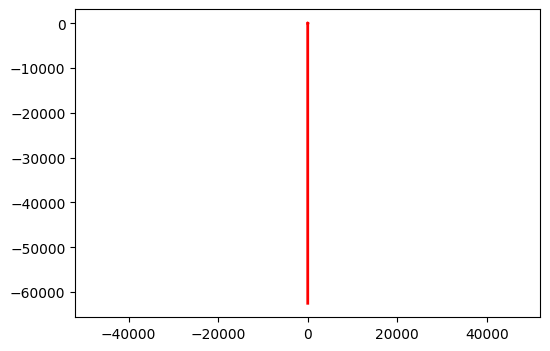

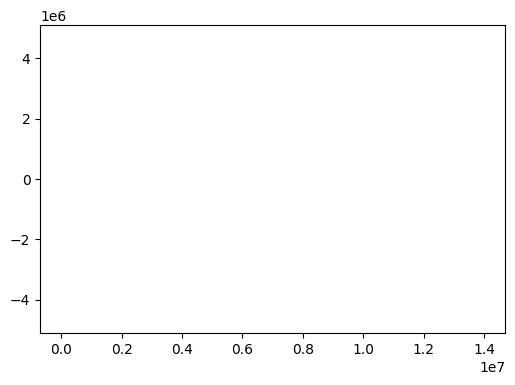

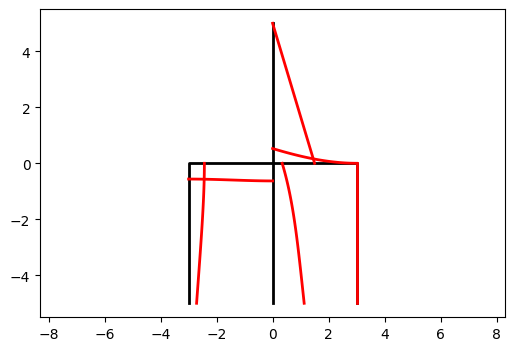

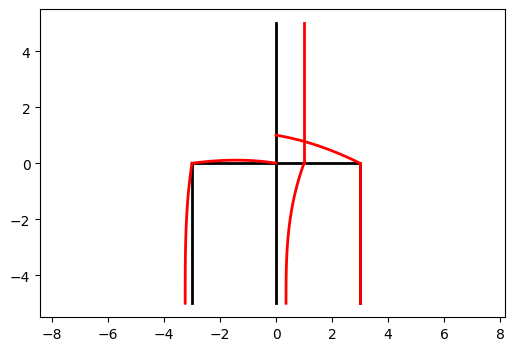

In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt

x,xA,xB,xC,xD,xE,xF=sy.symbols('x,xA,xB,xC,xD,xE,xF')
AE,EI,L,Lambda,Theta=sy.symbols('AE,EI,L,Lambda,Theta')
ri,rj=sy.symbols('ri,rj')

#   1.0 Datos del problema

#   1.1 Fuerzas externas en el nodo 1

FX1=10
FY1=-10
M1 =0

#   1.1 Coordenadas de los nodos

x1=0
y1=5

x2=-3
y2=0

x3=0
y3=0

x4=3
y4=0

x5=-3
y5=-5

x6=0
y6=-5

x7=3
y7=-5

#   1.2 Rotulas en los nodos (extremos de los elementos)

riA=1
rjA=1

riB=1
rjB=1

riC=1
rjC=1

riD=1
rjD=1

riE=1
rjE=1

riF=1
rjF=0

#   1.3 Rigideces de los resorte verticales a inicio de los elementos D, E y F

kG=10000
kH=10000
kI=10000

#   1.2 Propiedades mecanicas de los elementos estructurales

E=2E7

EA=E   #Modulo de elasticidad del materia del elemento A
EB=E   #Modulo de elasticidad del materia del elemento B
EC=E   #Modulo de elasticidad del materia del elemento C
ED=E   #Modulo de elasticidad del materia del elemento D
EE=E   #Modulo de elasticidad del materia del elemento E
EF=E   #Modulo de elasticidad del materia del elemento F


#   1.3 Propiedades geometricas de las secciones transversales de los elementos

#   1.3.1 Elemento A

bA=0.3
hA=0.4

AA=bA*hA        #Area de la seccion transversal del elemento A
IA=bA*hA**3/12  #Momento de inercia de la seccion transversal del elemento A

#   1.3.2 Elemento B

bB=0.3
hB=0.4

AB=bB*hB        #Area de la seccion transversal del elemento B
IB=bB*hB**3/12  #Momento de inercia de la seccion transversal del elemento B

#   1.3.3 Elemento C

bC=0.3
hC=0.4

AC=bC*hC        #Area de la seccion transversal del elemento C
IC=bC*hC**3/12  #Momento de inercia de la seccion transversal del elemento C

#   1.3.4 Elemento D

bD=0.3
hD=0.4

AD=bD*hD        #Area de la seccion transversal del elemento D
ID=bD*hD**3/12  #Momento de inercia de la seccion transversal del elemento D

#   1.3.5 Elemento E

bE=0.3
hE=0.4

AE=bE*hE        #Area de la seccion transversal del elemento E
IE=bE*hE**3/12  #Momento de inercia de la seccion transversal del elemento E

#   1.3.6 Elemento F

bF=0.3
hF=0.4

AF=bF*hF        #Area de la seccion transversal del elemento F
IF=bF*hF**3/12  #Momento de inercia de la seccion transversal del elemento F

#   1.4 Propiedades del suelo

CoefBalasto=1000

kB=CoefBalasto*bB
kC=CoefBalasto*bC
kD=CoefBalasto*bD
kE=CoefBalasto*bE
kF=CoefBalasto*bF

#   2.0 Definiciones

#   2.1 Elemento tipo barra

#   Funciones de forma

psi1=1-x/L
psi4=x/L

#   Funciones de Green


#   2.2 Elemento tipo viga con conexiones semi-rigidas

#   Funciones de forma

R=12-8*(ri+rj)+5*ri*rj

psi2=1-6*(1-ri)*(2-rj)/R*x/L-3*ri*(2-rj)/R*(x/L)**2+2*(ri+rj-ri*rj)/R*(x/L)**3
psi3=ri*((4-3*rj)/R*x/L-2*(3-2*rj)/R*(x/L)**2+(2-rj)/R*(x/L)**3)*L
psi5=6*(1-ri)*(2-rj)/R*x/L+3*ri*(2-rj)/R*(x/L)**2-2*(ri+rj-ri*rj)/R*(x/L)**3
psi6=rj*(-2*(1-ri)/R*x/L-ri/R*(x/L)**2+(2-ri)/R*(x/L)**3)*L

#   Funciones de Green

#   2.3 Viga sobre fundacion flexible con conexiones semirigidas

#   Funciones de forma

s =sy.sin (Lambda*L)
c =sy.cos (Lambda*L)
sh=sy.sinh(Lambda*L)
ch=sy.cosh(Lambda*L)

R=-4*Lambda*L*(c*s-ch*sh)*(2*ri*rj-ri-rj)+(1-2*s**2)*(4*(Lambda*L)**2*(1-ri)*(1-rj)-ri*rj)-(2*sh**2+1)*(4*(Lambda*L)**2*(1-ri)*(1-rj)+ri*rj)+2*ri*rj

#   Psi2

A2=2*ri*(2*Lambda*L*(1-rj)*(c*s+ch*sh)+rj*(s**2*ch**2+c**2*sh**2))
B2=-2*Lambda*L*ri*(1-rj)*(ch**2+sh**2)+2*Lambda*L*(-rj*(1-ri)+(s **2-c **2)*(ri+rj-2*ri*rj))+2*c *s* (4*(Lambda*L)**2*(1-ri)*(1-rj)-ri*rj)-2*sh*ch*ri*rj
C2=+2*Lambda*L*ri*(1-rj)*(c **2-s **2)+2*Lambda*L*( rj*(1-ri)+(ch**2+sh**2)*(ri+rj-2*ri*rj))+2*ch*sh*(4*(Lambda*L)**2*(1-ri)*(1-rj)+ri*rj)+2*s *c *ri*rj

Psi2=A2/R*sy.sin(Lambda*x)*sy.sinh(Lambda*x)+B2/R*sy.sin(Lambda*x)*sy.cosh(Lambda*x)+C2/R*sy.cos(Lambda*x)*sy.sinh(Lambda*x)+sy.cos(Lambda*x)*sy.cosh(Lambda*x)

#   Psi3

A3=ri*(4*Lambda*L*(1-rj)*(s**2*ch**2+c**2*sh**2)+2*rj*(sh*ch-s*c))/Lambda
B3=-2*sh*ri*(2*Lambda*L*ch*(1-rj)+rj*sh)/Lambda
C3=+2*s *ri*(2*Lambda*L*c *(1-rj)+rj*s )/Lambda

Psi3=A3/R*sy.sin(Lambda*x)*sy.sinh(Lambda*x)+B3/R*sy.sin(Lambda*x)*sy.cosh(Lambda*x)+C3/R*sy.cos(Lambda*x)*sy.sinh(Lambda*x)

#   Psi5

A5=4*ri*(-Lambda*L*(1-rj)*(s*ch+sh*c)-s*sh*rj)
B5=2*ch*(-2*Lambda*L*c *(2*ri*rj-ri-rj)-s *(4*(Lambda*L)**2*(1-ri)*(1-rj)-ri*rj))-2*rj*sh*(2*Lambda*L* s*(1-ri)-c *ri)
C5=2*c *(+2*Lambda*L*ch*(2*ri*rj-ri-rj)-sh*(4*(Lambda*L)**2*(1-ri)*(1-rj)+ri*rj))-2*rj*s *(2*Lambda*L*sh*(1-ri)+ch*ri)

Psi5=A5/R*sy.sin(Lambda*x)*sy.sinh(Lambda*x)+B5/R*sy.sin(Lambda*x)*sy.cosh(Lambda*x)+C5/R*sy.cos(Lambda*x)*sy.sinh(Lambda*x)

#   Psi6

A6=2*ri*rj*(s*ch-sh*c)/Lambda
B6=-2*sh*rj*(2*Lambda*L*c *(1-ri)+ri*s )/Lambda
C6=+2*s *rj*(2*Lambda*L*ch*(1-ri)+ri*sh)/Lambda

Psi6=A6/R*sy.sin(Lambda*x)*sy.sinh(Lambda*x)+B6/R*sy.sin(Lambda*x)*sy.cosh(Lambda*x)+C6/R*sy.cos(Lambda*x)*sy.sinh(Lambda*x)


#   2.4 Portico plano con conexiones semirigidas

#   Matriz de rigidez

R=12-8*(ri+rj)+5*ri*rj

kFrame=sy.zeros(6,6)

kFrame[0,0]=+AE/L
kFrame[0,3]=-AE/L

kFrame[1,1]=+12*EI/L**3*(ri+rj-ri*rj)/R
kFrame[1,2]=+6*EI/L**2*ri*(2-rj)/R
kFrame[1,4]=-12*EI/L**3*(ri+rj-ri*rj)/R
kFrame[1,5]=+6*EI/L**2*(2-ri)*rj/R

kFrame[2,1]=6*EI/L**2*ri*(2-rj)/R
kFrame[2,2]=4*EI/L*ri*(3-2*rj)/R
kFrame[2,4]=-6*EI/L**2*ri*(2-rj)/R
kFrame[2,5]=2*EI/L*ri*rj/R

kFrame[3,0]=-AE/L
kFrame[3,3]=+AE/L

kFrame[4,1]=-12*EI/L**3*(ri+rj-ri*rj)/R
kFrame[4,2]=-6*EI/L**2*ri*(2-rj)/R
kFrame[4,4]=+12*EI/L**3*(ri+rj-ri*rj)/R
kFrame[4,5]=-6*EI/L**2*(2-ri)*rj/R

kFrame[5,1]=6*EI/L**2*(2-ri)*rj/R
kFrame[5,2]=2*EI/L*ri*rj/R
kFrame[5,4]=-6*EI/L**2*(2-ri)*rj/R
kFrame[5,5]=4*EI/L*(3-2*ri)*rj/R

#   Matriz de transformacion

T=sy.zeros(6,6)

T[0,0]= sy.cos(Theta)
T[0,1]=sy.sin(Theta)

T[1,0]=-sy.sin(Theta)
T[1,1]=sy.cos(Theta)

T[2,2]=1

T[3,3]= sy.cos(Theta)
T[3,4]=sy.sin(Theta)

T[4,3]=-sy.sin(Theta)
T[4,4]=sy.cos(Theta)

T[5,5]=1

#   2.5 Elemento tipo pila con conexiones semi-rigidas

R=-4*Lambda*L*(c*s-ch*sh)*(2*ri*rj-ri-rj)+(1-2*s**2)*(4*(Lambda*L)**2*(1-ri)*(1-rj)-ri*rj)-(2*sh**2+1)*(4*(Lambda*L)**2*(1-ri)*(1-rj)+ri*rj)+2*ri*rj

kPile=sy.zeros(6,6)

kPile[0,0]=+AE/L
kPile[0,3]=-AE/L

kPile[1,1]=4*EI*Lambda**3/R*(4*(Lambda*L)**2*(1-ri)*(1-rj)*(c*s-ch*sh)+Lambda*L*((3*ri*rj-2*ri-rj)*(c**2-s**2+ch**2+sh**2)-2*rj*(1-ri))-2*ri*rj*(c*s+ch*sh))
kPile[1,2]=-4*EI*Lambda**2/R*ri*(2*Lambda*L*(1-rj)*(s*c+sh*ch)+rj*(s**2+sh**2))
kPile[1,4]=8*EI*Lambda**3/R*(2*Lambda*L*(ri+rj-2*ri*rj)*c*ch-(2*(Lambda*L)**2*(1-ri)*(1-rj)-ri*rj)*s*ch+(2*(Lambda*L)**2*(1-ri)*(1-rj)+ri*rj)*c*sh)
kPile[1,5]=-8*EI*Lambda**2/R*rj*(Lambda*L*(1-ri)*(ch*s+c*sh)+ri*s*sh)

kPile[2,1]=-4*EI*Lambda**2/R*ri*(2*Lambda*L*(1-rj)*(s*c+sh*ch)+rj*(s**2+sh**2))
kPile[2,2]=4*EI*Lambda/R*ri*(-2*Lambda*L*(1-rj)*(s**2*ch**2+c**2*sh**2)+rj*(s*c-sh*ch))
kPile[2,4]=8*EI*Lambda**2/R*ri*(Lambda*L*(1-rj)*(ch*s+c*sh)+rj*s*sh)
kPile[2,5]=4*EI*Lambda/R*ri*rj*(c*sh-ch*s)

kPile[3,0]=-AE/L
kPile[3,3]=+AE/L

kPile[4,1]=8*EI*Lambda**3/R*(2*Lambda*L*(ri+rj-2*ri*rj)*c*ch-(2*(Lambda*L)**2*(1-ri)*(1-rj)-ri*rj)*s*ch+(2*(Lambda*L)**2*(1-ri)*(1-rj)+ri*rj)*c*sh)
kPile[4,2]=8*EI*Lambda**2/R*ri*(Lambda*L*(1-rj)*(ch*s+c*sh)+rj*s*sh)
kPile[4,4]=4*EI*Lambda**3/R*(4*(Lambda*L)**2*(1-ri)*(1-rj)*(c*s-ch*sh)+Lambda*L*((3*ri*rj-ri-2*rj)*(c**2-s**2+ch**2+sh**2)-2*ri*(1-rj))-2*ri*rj*(c*s+ch*sh))
kPile[4,5]=4*EI*Lambda**2/R*rj*(2*Lambda*L*(1-ri)*(s*c+sh*ch)+ri*(s**2+sh**2))

kPile[5,1]=-8*EI*Lambda**2/R*rj*(Lambda*L*(1-ri)*(ch*s+c*sh)+ri*s*sh)
kPile[5,2]=4*EI*Lambda/R*ri*rj*(c*sh-ch*s)
kPile[5,4]=4*EI*Lambda**2/R*rj*(2*Lambda*L*(1-ri)*(s*c+sh*ch)+ri*(s**2+sh**2))
kPile[5,5]=4*EI*Lambda/R*rj*(-2*Lambda*L*(1-ri)*(s**2*ch**2+c**2*sh**2)+ri*(s*c-sh*ch))

#   3.0 calculos preliminares

#   3.1 Propiedades geometricas de los elementos

LA=sy.sqrt((x1-x3)**2+(y1-y3)**2)
ThetaA=sy.atan2(y1-y3,x1-x3)

LB=sy.sqrt((x3-x2)**2+(y3-y2)**2)
ThetaB=sy.atan2(y3-y2,x3-x2)

LC=sy.sqrt((x4-x3)**2+(y4-y3)**2)
ThetaC=sy.atan2(y4-y3,x4-x3)

LD=sy.sqrt((x2-x5)**2+(y2-y5)**2)
ThetaD=sy.atan2(y2-y5,x2-x5)

LE=sy.sqrt((x3-x6)**2+(y3-y6)**2)
ThetaE=sy.atan2(y3-y6,x3-x6)

LF=sy.sqrt((x4-x7)**2+(y4-y7)**2)
ThetaF=sy.atan2(y4-y7,x4-x7)

#   3.2 Propiedades del suelo

LambdaB=(kB/(4*E*IB))**0.25
LambdaC=(kC/(4*E*IC))**0.25
LambdaD=(kD/(4*E*ID))**0.25
LambdaE=(kE/(4*E*IE))**0.25
LambdaF=(kF/(4*E*IF))**0.25

#   4.0 Formulacion en coordenadas locales de cada elemeneto

kALoc=np.array(kFrame.subs({L:LA,EI:EA*IA,AE:AA*EA,               ri:riA,rj:rjA})).astype(np.float64)
kBLoc=np.array(kPile .subs({L:LB,EI:EB*IB,AE:AB*EB,Lambda:LambdaB,ri:riB,rj:rjB})).astype(np.float64)
kCLoc=np.array(kPile .subs({L:LC,EI:EC*IC,AE:AC*EC,Lambda:LambdaC,ri:riC,rj:rjC})).astype(np.float64)
kDLoc=np.array(kPile .subs({L:LD,EI:ED*ID,AE:AD*ED,Lambda:LambdaD,ri:riD,rj:rjD})).astype(np.float64)
kELoc=np.array(kPile .subs({L:LE,EI:EE*IE,AE:AE*EE,Lambda:LambdaE,ri:riE,rj:rjE})).astype(np.float64)
kFLoc=np.array(kPile .subs({L:LF,EI:EF*IF,AE:AF*EF,Lambda:LambdaF,ri:riF,rj:rjF})).astype(np.float64)

#   5.0 Formulacion en coordenadas globales de cada elemeneto

TA=np.array(T.subs({Theta:ThetaA})).astype(np.float64)
kAGlo=TA.T@kALoc@TA

TB=np.array(T.subs({Theta:ThetaB})).astype(np.float64)
kBGlo=TB.T@kBLoc@TB

TC=np.array(T.subs({Theta:ThetaC})).astype(np.float64)
kCGlo=TC.T@kCLoc@TC

TD=np.array(T.subs({Theta:ThetaD})).astype(np.float64)
kDGlo=TD.T@kDLoc@TD

TE=np.array(T.subs({Theta:ThetaE})).astype(np.float64)
kEGlo=TE.T@kELoc@TE

TF=np.array(T.subs({Theta:ThetaF})).astype(np.float64)
kFGlo=TF.T@kFLoc@TF

#   6.0 Ensamble del sistema de ecuaciones de toda la estructura

#   6.1 Matriz de rigidez

kDes=np.zeros([15,15])



# kRev=np.zeros([15,15])

# kRev[0 ,0 ]=kAGlo[3,3]
# kRev[0 ,1 ]=kAGlo[3,4]
# kRev[0 ,2 ]=kAGlo[3,5]
# kRev[0 ,6 ]=kAGlo[3,0]
# kRev[0 ,7 ]=kAGlo[3,1]
# kRev[0 ,8 ]=kAGlo[3,2]

# kRev[1 ,0 ]=kAGlo[4,3]
# kRev[1 ,1 ]=kAGlo[4,4]
# kRev[1 ,2 ]=kAGlo[4,5]
# kRev[1 ,6 ]=kAGlo[4,0]
# kRev[1 ,7 ]=kAGlo[4,1]
# kRev[1 ,8 ]=kAGlo[4,2]

# kRev[2 ,0 ]=kAGlo[5,3]
# kRev[2 ,1 ]=kAGlo[5,4]
# kRev[2 ,2 ]=kAGlo[5,5]
# kRev[2 ,6 ]=kAGlo[5,0]
# kRev[2 ,7 ]=kAGlo[5,1]
# kRev[2 ,8 ]=kAGlo[5,2]

# kRev[3 ,3 ]=kBGlo[0,0]+kDGlo[3,3]
# kRev[3 ,4 ]=kBGlo[0,1]+kDGlo[3,4]
# kRev[3 ,5 ]=kBGlo[0,2]+kDGlo[3,5]
# kRev[3 ,6 ]=kBGlo[0,3]
# kRev[3 ,7 ]=kBGlo[0,4]
# kRev[3 ,8 ]=kBGlo[0,5]
# kRev[3 ,12]=          +kDGlo[3,1]

# kRev[4 ,3 ]=kBGlo[1,0]+kDGlo[4,3]
# kRev[4 ,4 ]=kBGlo[1,1]+kDGlo[4,4]
# kRev[4 ,5 ]=kBGlo[1,2]+kDGlo[4,5]
# kRev[4 ,6 ]=kBGlo[1,3]
# kRev[4 ,7 ]=kBGlo[1,4]
# kRev[4 ,8 ]=kBGlo[1,5]
# kRev[4 ,12]=          +kDGlo[4,1]

# kRev[5 ,3 ]=kBGlo[2,0]+kDGlo[5,3]
# kRev[5 ,4 ]=kBGlo[2,1]+kDGlo[5,4]
# kRev[5 ,5 ]=kBGlo[2,2]+kDGlo[5,5]
# kRev[5 ,6 ]=kBGlo[2,3]
# kRev[5 ,7 ]=kBGlo[2,4]
# kRev[5 ,8 ]=kBGlo[2,5]
# kRev[5 ,12]=          +kDGlo[5,1]

# kRev[6 ,0 ]=kAGlo[0,3]
# kRev[6 ,1 ]=kAGlo[0,4]
# kRev[6 ,2 ]=kAGlo[0,5]
# kRev[6 ,3 ]=          +kBGlo[3,0]
# kRev[6 ,4 ]=          +kBGlo[3,1]
# kRev[6 ,5 ]=          +kBGlo[3,2]
# kRev[6 ,6 ]=kAGlo[0,0]+kBGlo[3,3]+kCGlo[0,0]+kEGlo[3,3]
# kRev[6 ,7 ]=kAGlo[0,1]+kBGlo[3,4]+kCGlo[0,1]+kEGlo[3,4]
# kRev[6 ,8 ]=kAGlo[0,2]+kBGlo[3,5]+kCGlo[0,2]+kEGlo[3,5]
# kRev[6 ,9 ]=                     +kCGlo[0,3]
# kRev[6 ,10]=                     +kCGlo[0,4]
# kRev[6 ,11]=                     +kCGlo[0,5]
# kRev[6 ,13]=                                +kEGlo[3,1]

# kRev[7 ,0 ]=kAGlo[1,3]
# kRev[7 ,1 ]=kAGlo[1,4]
# kRev[7 ,2 ]=kAGlo[1,5]
# kRev[7 ,3 ]=          +kBGlo[4,0]
# kRev[7 ,4 ]=          +kBGlo[4,1]
# kRev[7 ,5 ]=          +kBGlo[4,2]
# kRev[7 ,6 ]=kAGlo[1,0]+kBGlo[4,3]+kCGlo[1,0]+kEGlo[4,3]
# kRev[7 ,7 ]=kAGlo[1,1]+kBGlo[4,4]+kCGlo[1,1]+kEGlo[4,4]
# kRev[7 ,8 ]=kAGlo[1,0]+kBGlo[4,5]+kCGlo[1,2]+kEGlo[4,5]
# kRev[7 ,9 ]=                     +kCGlo[1,3]
# kRev[7 ,10]=                     +kCGlo[1,4]
# kRev[7 ,11]=                     +kCGlo[1,5]
# kRev[7 ,13]=                                +kEGlo[4,1]

# kRev[8 ,0 ]=kAGlo[2,3]
# kRev[8 ,1 ]=kAGlo[2,4]
# kRev[8 ,2 ]=kAGlo[2,5]
# kRev[8 ,3 ]=          +kBGlo[5,0]
# kRev[8 ,4 ]=          +kBGlo[5,1]
# kRev[8 ,5 ]=          +kBGlo[5,2]
# kRev[8 ,6 ]=kAGlo[2,0]+kBGlo[5,3]+kCGlo[2,0]+kEGlo[5,3]
# kRev[8 ,7 ]=kAGlo[2,1]+kBGlo[5,4]+kCGlo[2,1]+kEGlo[5,4]
# kRev[8 ,8 ]=kAGlo[2,2]+kBGlo[5,5]+kCGlo[2,2]+kEGlo[5,5]
# kRev[8 ,9 ]=                     +kCGlo[2,3]
# kRev[8 ,10]=                     +kCGlo[2,4]
# kRev[8 ,11]=                     +kCGlo[2,5]
# kRev[8 ,13]=                                +kEGlo[5,1]

# kRev[9 ,6 ]=kCGlo[3,0]
# kRev[9 ,7 ]=kCGlo[3,1]
# kRev[9 ,8 ]=kCGlo[3,2]
# kRev[9 ,9 ]=kCGlo[3,3]+kFGlo[3,3]
# kRev[9 ,10]=kCGlo[3,4]+kFGlo[3,4]
# kRev[9 ,11]=kCGlo[3,5]+kFGlo[3,5]
# kRev[9 ,14]=          +kFGlo[3,1]

# kRev[10,6 ]=kCGlo[4,0]
# kRev[10,7 ]=kCGlo[4,1]
# kRev[10,8 ]=kCGlo[4,2]
# kRev[10,9 ]=kCGlo[4,3]+kFGlo[4,3]
# kRev[10,10]=kCGlo[4,4]+kFGlo[4,4]
# kRev[10,11]=kCGlo[4,5]+kFGlo[4,5]
# kRev[10,14]=          +kFGlo[4,1]

# kRev[11,6 ]=kCGlo[5,0]
# kRev[11,7 ]=kCGlo[5,1]
# kRev[11,8 ]=kCGlo[5,2]
# kRev[11,9 ]=kCGlo[5,3]+kFGlo[5,3]
# kRev[11,10]=kCGlo[5,4]+kFGlo[5,4]
# kRev[11,11]=kCGlo[5,5]+kFGlo[5,5]
# kRev[11,14]=          +kFGlo[5,1]

# kRev[12,3 ]=kDGlo[1,3]
# kRev[12,4 ]=kDGlo[1,4]
# kRev[12,5 ]=kDGlo[1,5]
# kRev[12,12]=kDGlo[1,1]+kG

# kRev[13,6 ]=kEGlo[1,3]
# kRev[13,7 ]=kEGlo[1,4]
# kRev[13,8 ]=kEGlo[1,5]
# kRev[13,13]=kEGlo[1,1]+kH

# kRev[14,9 ]=kFGlo[1,3]
# kRev[14,10]=kFGlo[1,4]
# kRev[14,11]=kFGlo[1,5]
# kRev[14,14]=kFGlo[1,1]+kI



kDes[ 0, 0]=kAGlo[ 3, 3]
kDes[ 0, 1]=kAGlo[ 3, 4]
kDes[ 0, 2]=kAGlo[ 3, 5]
kDes[ 0, 6]=kAGlo[ 3, 0]
kDes[ 0, 7]=kAGlo[ 3, 1]
kDes[ 0, 8]=kAGlo[ 3, 2]

kDes[ 1, 0]=kAGlo[ 4, 3]
kDes[ 1, 1]=kAGlo[ 4, 4]
kDes[ 1, 2]=kAGlo[ 4, 5]
kDes[ 1, 6]=kAGlo[ 4, 0]
kDes[ 1, 7]=kAGlo[ 4, 1]
kDes[ 1, 8]=kAGlo[ 4, 2]

kDes[ 2, 0]=kAGlo[ 5, 3]
kDes[ 2, 1]=kAGlo[ 5, 4]
kDes[ 2, 2]=kAGlo[ 5, 5]
kDes[ 2, 6]=kAGlo[ 5, 0]
kDes[ 2, 7]=kAGlo[ 5, 1]
kDes[ 2, 8]=kAGlo[ 5, 2]

kDes[ 3, 3]=kBGlo[0,0]+kDGlo[3,3]
kDes[ 3, 4]=kBGlo[0,1]+kDGlo[3,4]
kDes[ 3, 5]=kBGlo[0,2]+kDGlo[3,5]
kDes[ 3, 6]=kBGlo[0,3]
kDes[ 3, 7]=kBGlo[0,4]
kDes[ 3, 8]=kBGlo[0,5]
kDes[ 3,12]=          +kDGlo[3,1]

kDes[ 4, 3]=kBGlo[1,0]+kDGlo[4,3]
kDes[ 4, 4]=kBGlo[1,1]+kDGlo[4,4]
kDes[ 4, 5]=kBGlo[1,2]+kDGlo[4,5]
kDes[ 4, 6]=kBGlo[1,3]
kDes[ 4, 7]=kBGlo[1,4]
kDes[ 4, 8]=kBGlo[1,5]
kDes[ 4,12]=          +kDGlo[4,1]

kDes[ 5, 3]=kBGlo[2,0]+kDGlo[5,3]
kDes[ 5, 4]=kBGlo[2,1]+kDGlo[5,4]
kDes[ 5, 5]=kBGlo[2,2]+kDGlo[5,5]
kDes[ 5, 6]=kBGlo[2,3]
kDes[ 5, 7]=kBGlo[2,4]
kDes[ 5, 8]=kBGlo[2,5]
kDes[ 5,12]=          +kDGlo[5,1]

kDes[ 6, 0]=kAGlo[0,3]
kDes[ 6, 1]=kAGlo[0,4]
kDes[ 6, 2]=kAGlo[0,5]
kDes[ 6, 3]=          +kBGlo[3,0]
kDes[ 6, 4]=          +kBGlo[3,1]
kDes[ 6, 5]=          +kBGlo[3,2]
kDes[ 6, 6]=kAGlo[0,0]+kBGlo[3,3]+kCGlo[0,0]+kEGlo[3,3]
kDes[ 6, 7]=kAGlo[0,1]+kBGlo[3,4]+kCGlo[0,1]+kEGlo[3,4]
kDes[ 6, 8]=kAGlo[0,2]+kBGlo[3,5]+kCGlo[0,2]+kEGlo[3,5]
kDes[ 6, 9]=                     +kCGlo[0,3]
kDes[ 6,10]=                     +kCGlo[0,4]
kDes[ 6,11]=                     +kCGlo[0,5]
kDes[ 6,13]=                                +kEGlo[3,1]

kDes[ 7, 0]=kAGlo[1,3]
kDes[ 7, 1]=kAGlo[1,4]
kDes[ 7, 2]=kAGlo[1,5]
kDes[ 7, 3]=          +kBGlo[4,0]
kDes[ 7, 4]=          +kBGlo[4,1]
kDes[ 7, 5]=          +kBGlo[4,2]
kDes[ 7, 6]=kAGlo[1,0]+kBGlo[4,3]+kCGlo[1,0]+kEGlo[4,3]
kDes[ 7, 7]=kAGlo[1,1]+kBGlo[4,4]+kCGlo[1,1]+kEGlo[4,4]
kDes[ 7, 8]=kAGlo[1,2]+kBGlo[4,5]+kCGlo[1,2]+kEGlo[4,5]
kDes[ 7, 9]=                     +kCGlo[1,3]
kDes[ 7,10]=                     +kCGlo[1,4]
kDes[ 7,11]=                     +kCGlo[1,5]
kDes[ 7,13]=                                +kEGlo[4,1]

kDes[ 8, 0]=kAGlo[2,3]
kDes[ 8, 1]=kAGlo[2,4]
kDes[ 8, 2]=kAGlo[2,5]
kDes[ 8, 3]=          +kBGlo[5,0]
kDes[ 8, 4]=          +kBGlo[5,1]
kDes[ 8, 5]=          +kBGlo[5,2]
kDes[ 8, 6]=kAGlo[2,0]+kBGlo[5,3]+kCGlo[2,0]+kEGlo[5,3]
kDes[ 8, 7]=kAGlo[2,1]+kBGlo[5,4]+kCGlo[2,1]+kEGlo[5,4]
kDes[ 8, 8]=kAGlo[2,2]+kBGlo[5,5]+kCGlo[2,2]+kEGlo[5,5]
kDes[ 8, 9]=                     +kCGlo[2,3]
kDes[ 8,10]=                     +kCGlo[2,4]
kDes[ 8,11]=                     +kCGlo[2,5]
kDes[ 8,13]=                                +kEGlo[5,1]

kDes[ 9, 6]=kCGlo[3,0]
kDes[ 9, 7]=kCGlo[3,1]
kDes[ 9, 8]=kCGlo[3,2]
kDes[ 9, 9]=kCGlo[3,3]+kFGlo[3,3]
kDes[ 9,10]=kCGlo[3,4]+kFGlo[3,4]
kDes[ 9,11]=kCGlo[3,5]+kFGlo[3,5]
kDes[ 9,14]=          +kFGlo[3,1]

kDes[10, 6]=kCGlo[4,0]
kDes[10, 7]=kCGlo[4,1]
kDes[10, 8]=kCGlo[4,2]
kDes[10, 9]=kCGlo[4,3]+kFGlo[4,3]
kDes[10,10]=kCGlo[4,4]+kFGlo[4,4]
kDes[10,11]=kCGlo[4,5]+kFGlo[4,5]
kDes[10,14]=          +kFGlo[4,1]

kDes[11, 6]=kCGlo[5,0]
kDes[11, 7]=kCGlo[5,1]
kDes[11, 8]=kCGlo[5,2]
kDes[11, 9]=kCGlo[5,3]+kFGlo[5,3]
kDes[11,10]=kCGlo[5,4]+kFGlo[5,4]
kDes[11,11]=kCGlo[5,5]+kFGlo[5,5]
kDes[11,14]=          +kFGlo[5,1]

kDes[12, 3]=kDGlo[1,3]
kDes[12, 4]=kDGlo[1,4]
kDes[12, 5]=kDGlo[1,5]
kDes[12,12]=kDGlo[1,1]+kG

kDes[13, 6]=kEGlo[1,3]
kDes[13, 7]=kEGlo[1,4]
kDes[13, 8]=kEGlo[1,5]
kDes[13,13]=kEGlo[1,1]+kH

kDes[14, 9]=kFGlo[1,3]
kDes[14,10]=kFGlo[1,4]
kDes[14,11]=kFGlo[1,5]
kDes[14,14]=kFGlo[1,1]+kI

#   6.2 Vector de fuerzas de empotramiento

fNodDes=np.zeros([15,1])

fNodDes[0,0]=FX1
fNodDes[1,0]=FY1
fNodDes[2,0]=M1

#   6.3 Solucion del sistema de ecuaciones

DesDes=np.linalg.solve(kDes,fNodDes)

u1=DesDes[0 ,0]
v1=DesDes[1 ,0]
q1=DesDes[2 ,0]
u2=DesDes[3 ,0]
v2=DesDes[4 ,0]
q2=DesDes[5 ,0]
u3=DesDes[6 ,0]
v3=DesDes[7 ,0]
q3=DesDes[8 ,0]
u4=DesDes[9 ,0]
v4=DesDes[10,0]
q4=DesDes[11,0]
v5=DesDes[12,0]
v6=DesDes[13,0]
v7=DesDes[14,0]

u5=0
q5=0
u6=0
q6=0
u7=0
q7=0


#%%   7.0 Calculo de los campos de desplazamiento de cada elemento

#   7.1 Elemento A

DesNodAGlo=np.array([[u3],[v3],[q3],[u1],[v1],[q1]])
DesNodALoc=TA@DesNodAGlo

u3A=DesNodALoc[0,0]
v3A=DesNodALoc[1,0]
q3A=DesNodALoc[2,0]
u1A=DesNodALoc[3,0]
v1A=DesNodALoc[4,0]
q1A=DesNodALoc[5,0]

uA=sy.expand(psi1.subs({x:xA,L:LA})*u3A+psi4.subs({x:xA,L:LA})*u1A)
vA=psi2.subs({x:xA,L:LA,ri:riA,rj:rjA})*v3A+psi3.subs({x:xA,L:LA,ri:riA,rj:rjA})*q3A+psi5.subs({x:xA,L:LA,ri:riA,rj:rjA})*v1A+psi6.subs({x:xA,L:LA,ri:riA,rj:rjA})*q1A

#   7.2 Elemento B

DesNodBGlo=np.array([[u2],[v2],[q2],[u3],[v3],[q3]])
DesNodBLoc=TB@DesNodBGlo

u2B=DesNodBLoc[0,0]
v2B=DesNodBLoc[1,0]
q2B=DesNodBLoc[2,0]
u3B=DesNodBLoc[3,0]
v3B=DesNodBLoc[4,0]
q3B=DesNodBLoc[5,0]

uB=sy.expand(psi1.subs({x:xB,L:LB})*u2B+psi4.subs({x:xB,L:LB})*u3B)
vB=sy.expand(Psi2.subs({x:xB,L:LB,Lambda:LambdaB,ri:riB,rj:rjB})*v2B+Psi3.subs({x:xB,L:LB,Lambda:LambdaB,ri:riB,rj:rjB})*q2B+Psi5.subs({x:xB,L:LB,Lambda:LambdaB,ri:riB,rj:rjB})*v3B+Psi6.subs({x:xB,L:LB,Lambda:LambdaB,ri:riB,rj:rjB})*q3B)

#   7.3 Elemento C

DesNodCGlo=np.array([[u3],[v3],[q3],[u4],[v4],[q4]])
DesNodCLoc=TC@DesNodCGlo

u3C=DesNodCLoc[0,0]
v3C=DesNodCLoc[1,0]
q3C=DesNodCLoc[2,0]
u4C=DesNodCLoc[3,0]
v4C=DesNodCLoc[4,0]
q4C=DesNodCLoc[5,0]

uC=sy.expand(psi1.subs({x:xC,L:LC})*u3C+psi4.subs({x:xC,L:LC})*u4C)
vC=sy.expand(Psi2.subs({x:xC,L:LC,Lambda:LambdaC,ri:riC,rj:rjC})*v3C+Psi3.subs({x:xC,L:LC,Lambda:LambdaC,ri:riC,rj:rjC})*q3C+Psi5.subs({x:xC,L:LC,Lambda:LambdaC,ri:riC,rj:rjC})*v4C+Psi6.subs({x:xC,L:LC,Lambda:LambdaC,ri:riC,rj:rjC})*q4C)

#   7.4 Elemento D

DesNodDGlo=np.array([[u5],[v5],[q5],[u2],[v2],[q2]])
DesNodDLoc=TD@DesNodDGlo

u5D=DesNodDLoc[0,0]
v5D=DesNodDLoc[1,0]
q5D=DesNodDLoc[2,0]
u2D=DesNodDLoc[3,0]
v2D=DesNodDLoc[4,0]
q2D=DesNodDLoc[5,0]

uD=sy.expand(psi1.subs({x:xD,L:LD})*u5D+psi4.subs({x:xD,L:LD})*u2D)
vD=sy.expand(Psi2.subs({x:xD,L:LD,Lambda:LambdaD,ri:riD,rj:rjD})*v5D+Psi3.subs({x:xD,L:LD,Lambda:LambdaD,ri:riD,rj:rjD})*q5D+Psi5.subs({x:xD,L:LD,Lambda:LambdaD,ri:riD,rj:rjD})*v2D+Psi6.subs({x:xD,L:LD,Lambda:LambdaD,ri:riD,rj:rjD})*q2D)

#   7.5 Elemento E

DesNodEGlo=np.array([[u6],[v6],[q6],[u3],[v3],[q3]])
DesNodELoc=TE@DesNodEGlo

u6E=DesNodELoc[0,0]
v6E=DesNodELoc[1,0]
q6E=DesNodELoc[2,0]
u3E=DesNodELoc[3,0]
v3E=DesNodELoc[4,0]
q3E=DesNodELoc[5,0]

uE=sy.expand(psi1.subs({x:xE,L:LE})*u6E+psi4.subs({x:xE,L:LE})*u3E)
vE=sy.expand(Psi2.subs({x:xE,L:LE,Lambda:LambdaE,ri:riE,rj:rjE})*v6E+Psi3.subs({x:xE,L:LE,Lambda:LambdaE,ri:riE,rj:rjE})*q6E+Psi5.subs({x:xE,L:LE,Lambda:LambdaE,ri:riE,rj:rjE})*v3E+Psi6.subs({x:xE,L:LE,Lambda:LambdaE,ri:riE,rj:rjE})*q3E)

#   7.6 Elemento F

DesNodFGlo=np.array([[u7],[v7],[q7],[u4],[v4],[q4]])
DesNodFLoc=TF@DesNodFGlo

u7F=DesNodFLoc[0,0]
v7F=DesNodFLoc[1,0]
q7F=DesNodFLoc[2,0]
u4F=DesNodFLoc[3,0]
v4F=DesNodFLoc[4,0]
q4F=DesNodFLoc[5,0]

uF=sy.expand(psi1.subs({x:xF,L:LF})*u7F+psi4.subs({x:xF,L:LF})*u4F)
vF=sy.expand(Psi2.subs({x:xF,L:LF,Lambda:LambdaF,ri:riF,rj:rjF})*v7F+Psi3.subs({x:xF,L:LF,Lambda:LambdaF,ri:riF,rj:rjF})*q7F+Psi5.subs({x:xF,L:LF,Lambda:LambdaF,ri:riF,rj:rjF})*v4F+Psi6.subs({x:xF,L:LF,Lambda:LambdaF,ri:riF,rj:rjF})*q4F)

#   8.0 Calculo de los campos de fuerzas internas

#   8.1 Elemento A

PA=+AA*EA*sy.diff(uA,xA,1)
MA=+EA*IA*sy.diff(vA,xA,2)
VA=-EA*IA*sy.diff(vA,xA,3)

#   8.2 Elemento B

PB=+AB*EB*sy.diff(uB,xB,1)
MB=+EB*IB*sy.diff(vB,xB,2)
VB=-EB*IB*sy.diff(vB,xB,3)

#   8.3 Elemento C

PC=+AC*EC*sy.diff(uC,xC,1)
MC=+EC*IC*sy.diff(vC,xC,2)
VC=-EC*IC*sy.diff(vC,xC,3)

#   8.4 Elemento D

PD=+AD*ED*sy.diff(uD,xD,1)
MD=+ED*ID*sy.diff(vD,xD,2)
VD=-ED*ID*sy.diff(vD,xD,3)

#   8.5 Elemento E

PE=+AE*EE*sy.diff(uE,xE,1)
ME=+EE*IE*sy.diff(vE,xE,2)
VE=-EE*IE*sy.diff(vE,xE,3)

#   8.6 Elemento F

PF=+AF*EF*sy.diff(uF,xF,1)
MF=+EF*IF*sy.diff(vF,xF,2)
VF=-EF*IF*sy.diff(vF,xF,3)

#   9.0 Calculo de las fuerzas que el suelo ejerce sobre los elementos

fsB=-kB*vB
fsC=-kC*vC
fsD=-kD*vD
fsE=-kE*vE
fsF=-kF*vF

#   10.0 Calculo de las reacciones

FX5=VD.subs({xD:0})
FY5=-kG*v5
M5 =-MD.subs({xD:0})
FX6=VE.subs({xE:0})
FY6=-kH*v6
M6 =-ME.subs({xE:0})
FX7=VF.subs({xF:0})
FY7=-kI*v7
M7 =-MF.subs({xF:0})

SFX=FX1+FX5+FX6+FX7-sy.integrate(fsD,(xD,0,LD))-sy.integrate(fsE,(xE,0,LE))-sy.integrate(fsF,(xF,0,LF))
SFY=FY1+FY5+FY6+FY7+sy.integrate(fsB,(xB,0,LB))+sy.integrate(fsC,(xC,0,LC))
SM5=M5+M6+M7-FX1*(y1-y5)+FY1*(x1-x5)+M1+FY6*(x6-x5)+FY7*(x7-x5)+sy.integrate(fsB*xB,(xB,0,LB))+sy.integrate(fsC*((x3-x2)+xC),(xC,0,LC))+sy.integrate(fsD*xD,(xD,0,LD))+sy.integrate(fsE*xE,(xE,0,LE))+sy.integrate(fsF*xF,(xF,0,LF))

#%%   9.0 Evaluacion de los campos para la realizacion de las figuras

NxFig=100

xANum=np.linspace(0,float(LA),NxFig)
xBNum=np.linspace(0,float(LB),NxFig)
xCNum=np.linspace(0,float(LC),NxFig)
xDNum=np.linspace(0,float(LD),NxFig)
xENum=np.linspace(0,float(LE),NxFig)
xFNum=np.linspace(0,float(LF),NxFig)

#   9.1 Elemento A

uANum=sy.lambdify(xA,uA)(xANum)
vANum=sy.lambdify(xA,vA)(xANum)
PANum=sy.lambdify(xA,PA)(xANum)
MANum=sy.lambdify(xA,MA)(xANum)
VANum=sy.lambdify(xA,VA)(xANum)

#   9.2 Elemento B

uBNum=sy.lambdify(xB,uB)(xBNum)
vBNum=sy.lambdify(xB,vB)(xBNum)
PBNum=sy.lambdify(xB,PB)(xBNum)
MBNum=sy.lambdify(xB,MB)(xBNum)
VBNum=sy.lambdify(xB,VB)(xBNum)

#   9.3 Elemento C

uCNum=sy.lambdify(xC,uC)(xCNum)
vCNum=sy.lambdify(xC,vC)(xCNum)
PCNum=sy.lambdify(xC,PC)(xCNum)
MCNum=sy.lambdify(xC,MC)(xCNum)
VCNum=sy.lambdify(xC,VC)(xCNum)

#   9.4 Elemento D

uDNum=sy.lambdify(xD,uD)(xDNum)
vDNum=sy.lambdify(xD,vD)(xDNum)
PDNum=sy.lambdify(xD,PD)(xDNum)
MDNum=sy.lambdify(xD,MD)(xDNum)
VDNum=sy.lambdify(xD,VD)(xDNum)

#   9.5 Elemento E

uENum=sy.lambdify(xE,uE)(xENum)
vENum=sy.lambdify(xE,vE)(xENum)
PENum=sy.lambdify(xE,PE)(xENum)
MENum=sy.lambdify(xE,ME)(xENum)
VENum=sy.lambdify(xE,VE)(xENum)

#   9.6 Elemento F

uFNum=sy.lambdify(xF,uF)(xFNum)
vFNum=sy.lambdify(xF,vF)(xFNum)
PFNum=sy.lambdify(xF,PF)(xFNum)
MFNum=sy.lambdify(xF,MF)(xFNum)
VFNum=sy.lambdify(xF,VF)(xFNum)

#%% 10.0 Figuras

plt.close('all')

#%%   10.1 Configuracion deformada

EscDiaDes=150

#   Elemento A
xGloA=x3+(xANum+uANum*EscDiaDes)*np.cos(float(ThetaA))-vANum*np.sin(float(ThetaA))*EscDiaDes
yGloA=y3+(xANum+uANum*EscDiaDes)*np.sin(float(ThetaA))+vANum*np.cos(float(ThetaA))*EscDiaDes    

##   Elemento B
xGloB=x2+(xBNum+uBNum*EscDiaDes)*np.cos(float(ThetaB))-vBNum*np.sin(float(ThetaB))*EscDiaDes
yGloB=y2+(xBNum+uBNum*EscDiaDes)*np.sin(float(ThetaB))+vBNum*np.cos(float(ThetaB))*EscDiaDes

#   Elemento C
xGloC=x3+(xCNum+uCNum*EscDiaDes)*np.cos(float(ThetaC))-vCNum*np.sin(float(ThetaC))*EscDiaDes
yGloC=y3+(xCNum+uCNum*EscDiaDes)*np.sin(float(ThetaC))+vCNum*np.cos(float(ThetaC))*EscDiaDes

#   Elemento D
xGloD=x5+(xDNum+uDNum*EscDiaDes)*np.cos(float(ThetaD))-vDNum*np.sin(float(ThetaD))*EscDiaDes
yGloD=y5+(xDNum+uDNum*EscDiaDes)*np.sin(float(ThetaD))+vDNum*np.cos(float(ThetaD))*EscDiaDes    

##   Elemento E
xGloE=x6+(xENum+uENum*EscDiaDes)*np.cos(float(ThetaE))-vENum*np.sin(float(ThetaE))*EscDiaDes
yGloE=y6+(xENum+uENum*EscDiaDes)*np.sin(float(ThetaE))+vENum*np.cos(float(ThetaE))*EscDiaDes

#   Elemento F
xGloF=x7+(xFNum+uFNum*EscDiaDes)*np.cos(float(ThetaF))-vFNum*np.sin(float(ThetaF))*EscDiaDes
yGloF=y7+(xFNum+uFNum*EscDiaDes)*np.sin(float(ThetaF))+vFNum*np.cos(float(ThetaF))*EscDiaDes


plt.figure('Configuracion deformada',figsize=(6,4))

plt.plot([x6,x1],[y6,y1],color='k',linewidth=2)
plt.plot([x5,x2,x4,x7],[y5,y2,y4,y7],color='k',linewidth=2)
plt.plot(xGloA,yGloA,color='r',linewidth=2)
plt.plot(xGloB,yGloB,color='r',linewidth=2)
plt.plot(xGloC,yGloC,color='r',linewidth=2)
plt.plot(xGloD,yGloD,color='r',linewidth=2)
plt.plot(xGloE,yGloE,color='r',linewidth=2)
plt.plot(xGloF,yGloF,color='r',linewidth=2)

plt.axis('equal')

#%%   10.2 Campo de fuerza axial

EscDiaAxi=0.07

#   Elemento A
xGloA=x3+xANum*np.cos(float(ThetaA))-PANum*np.sin(float(ThetaA))*EscDiaAxi
yGloA=y3+xANum*np.sin(float(ThetaA))+PANum*np.cos(float(ThetaA))*EscDiaAxi    

#   Elemento B
xGloB=x2+xBNum*np.cos(float(ThetaB))-PBNum*np.sin(float(ThetaB))*EscDiaAxi
yGloB=y2+xBNum*np.sin(float(ThetaB))+PBNum*np.cos(float(ThetaB))*EscDiaAxi  

#   Elemento C
xGloC=x3+xCNum*np.cos(float(ThetaC))-PCNum*np.sin(float(ThetaC))*EscDiaAxi
yGloC=y3+xCNum*np.sin(float(ThetaC))+PCNum*np.cos(float(ThetaC))*EscDiaAxi  

#   Elemento D
xGloD=x5+xDNum*np.cos(float(ThetaD))-PDNum*np.sin(float(ThetaD))*EscDiaAxi
yGloD=y5+xDNum*np.sin(float(ThetaD))+PDNum*np.cos(float(ThetaD))*EscDiaAxi    

#   Elemento E
xGloE=x6+xENum*np.cos(float(ThetaE))-PENum*np.sin(float(ThetaE))*EscDiaAxi
yGloE=y6+xENum*np.sin(float(ThetaE))+PENum*np.cos(float(ThetaE))*EscDiaAxi  

#   Elemento F
xGloF=x7+xFNum*np.cos(float(ThetaF))-PFNum*np.sin(float(ThetaF))*EscDiaAxi
yGloF=y7+xFNum*np.sin(float(ThetaF))+PFNum*np.cos(float(ThetaF))*EscDiaAxi  

plt.figure('Diagrama fuerza axial',figsize=(6,4))

plt.plot([x6,x1],[y6,y1],color='k',linewidth=2)
plt.plot([x5,x2,x4,x7],[y5,y2,y4,y7],color='k',linewidth=2)
plt.plot(xGloA,yGloA,color='r',linewidth=2)
plt.plot(xGloB,yGloB,color='r',linewidth=2)
plt.plot(xGloC,yGloC,color='r',linewidth=2)
plt.plot(xGloD,yGloD,color='r',linewidth=2)
plt.plot(xGloE,yGloE,color='r',linewidth=2)
plt.plot(xGloF,yGloF,color='r',linewidth=2)

plt.axis('equal')

#%%   10.3 Campo de momento flector

EscDiaMom=0.03

#   Elemento A
xGloA=x3+xANum*np.cos(float(ThetaA))-MANum*np.sin(float(ThetaA))*EscDiaMom
yGloA=y3+xANum*np.sin(float(ThetaA))+MANum*np.cos(float(ThetaA))*EscDiaMom  

#   Elemento B
xGloB=x2+xBNum*np.cos(float(ThetaB))-MBNum*np.sin(float(ThetaB))*EscDiaMom
yGloB=y2+xBNum*np.sin(float(ThetaB))+MBNum*np.cos(float(ThetaB))*EscDiaMom

#   Elemento C
xGloC=x3+xCNum*np.cos(float(ThetaC))-MCNum*np.sin(float(ThetaC))*EscDiaMom
yGloC=y3+xCNum*np.sin(float(ThetaC))+MCNum*np.cos(float(ThetaC))*EscDiaMom

#   Elemento D
xGloD=x5+xDNum*np.cos(float(ThetaD))-MDNum*np.sin(float(ThetaD))*EscDiaMom
yGloD=y5+xDNum*np.sin(float(ThetaD))+MDNum*np.cos(float(ThetaD))*EscDiaMom

#   Elemento E
xGloE=x6+xENum*np.cos(float(ThetaE))-MENum*np.sin(float(ThetaE))*EscDiaMom
yGloE=y6+xENum*np.sin(float(ThetaE))+MENum*np.cos(float(ThetaE))*EscDiaMom

#   Elemento F
xGloF=x7+xFNum*np.cos(float(ThetaF))-MFNum*np.sin(float(ThetaF))*EscDiaMom
yGloF=y7+xFNum*np.sin(float(ThetaF))+MFNum*np.cos(float(ThetaF))*EscDiaMom

plt.figure('Diagrama momento flector',figsize=(6,4))

plt.plot([x6,x1],[y6,y1],color='k',linewidth=2)
plt.plot([x5,x2,x4,x7],[y5,y2,y4,y7],color='k',linewidth=2)
plt.plot(xGloA,yGloA,color='r',linewidth=2)
plt.plot(xGloB,yGloB,color='r',linewidth=2)
plt.plot(xGloC,yGloC,color='r',linewidth=2)
plt.plot(xGloD,yGloD,color='r',linewidth=2)
plt.plot(xGloE,yGloE,color='r',linewidth=2)
plt.plot(xGloF,yGloF,color='r',linewidth=2)

plt.axis('equal')

#%%   10.4 Campo de fuerza cortante

EscDiaCor=0.1

#   Elemento A
xGloA=x3+xANum*np.cos(float(ThetaA))-VANum*np.sin(float(ThetaA))*EscDiaCor
yGloA=y3+xANum*np.sin(float(ThetaA))+VANum*np.cos(float(ThetaA))*EscDiaCor    

#   Elemento B
xGloB=x2+xBNum*np.cos(float(ThetaB))-VBNum*np.sin(float(ThetaB))*EscDiaCor
yGloB=y2+xBNum*np.sin(float(ThetaB))+VBNum*np.cos(float(ThetaB))*EscDiaCor  

#   Elemento C
xGloC=x3+xCNum*np.cos(float(ThetaC))-VCNum*np.sin(float(ThetaC))*EscDiaCor
yGloC=y3+xCNum*np.sin(float(ThetaC))+VCNum*np.cos(float(ThetaC))*EscDiaCor  

#   Elemento D
xGloD=x5+xDNum*np.cos(float(ThetaD))-VDNum*np.sin(float(ThetaD))*EscDiaCor
yGloD=y5+xDNum*np.sin(float(ThetaD))+VDNum*np.cos(float(ThetaD))*EscDiaCor  

#   Elemento E
xGloE=x6+xENum*np.cos(float(ThetaE))-VENum*np.sin(float(ThetaE))*EscDiaCor
yGloE=y6+xENum*np.sin(float(ThetaE))+VENum*np.cos(float(ThetaE))*EscDiaCor

#   Elemento F
xGloF=x7+xFNum*np.cos(float(ThetaF))-VFNum*np.sin(float(ThetaF))*EscDiaCor
yGloF=y7+xFNum*np.sin(float(ThetaF))+VFNum*np.cos(float(ThetaF))*EscDiaCor  

plt.figure('Diagrama fuerza cortante',figsize=(6,4))

plt.plot([x6,x1],[y6,y1],color='k',linewidth=2)
plt.plot([x5,x2,x4,x7],[y5,y2,y4,y7],color='k',linewidth=2)
plt.plot(xGloA,yGloA,color='r',linewidth=2)
plt.plot(xGloB,yGloB,color='r',linewidth=2)
plt.plot(xGloC,yGloC,color='r',linewidth=2)
plt.plot(xGloD,yGloD,color='r',linewidth=2)
plt.plot(xGloE,yGloE,color='r',linewidth=2)
plt.plot(xGloF,yGloF,color='r',linewidth=2)

plt.axis('equal')